In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd


# Reproducibility so the results stay the same every time note book is ran
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed(420)

In [10]:
# Loading and labeling training dataset
train_ = image_dataset_from_directory(
    './images/train',
    labels='inferred',
    label_mode='binary',
    image_size=[299, 299],
    interpolation='nearest',
    batch_size=64,
    shuffle=True
)

# Loading and labeling testing dataset
test_ = image_dataset_from_directory(
    './images/test',
    labels='inferred',
    label_mode='binary',
    image_size=[299, 299],
    interpolation='nearest',
    batch_size=64,
    shuffle=True
)

# Plots 20 random images from the dataset
def plot_random_images(classtype):
    plt.figure(figsize=(10, 10))
    class_names = classtype.class_names
    for images, labels in classtype:
        for i in range(32):
            ax = plt.subplot(6, 6, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[int(labels[i])] + f'{labels[i]}')
            plt.axis("off")

Found 4466 files belonging to 2 classes.
Found 800 files belonging to 2 classes.


In [11]:
# Disabled for public repo
# plot_random_images(train_)

In [12]:
# Disabled for public repo
# plot_random_images(test_)

In [13]:
# Preprocessing images for the model
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
train = train_.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)
test = test_.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# Loading a pretrained base i.e. a model that Pytorch Team has made
pretrained_base = tf.keras.applications.InceptionV3(include_top=True)
pretrained_base.trainable = False

In [15]:
# Building a model on top of the pretrained base
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Training the model
history = model.fit(train, validation_data=test, epochs=3)

Epoch 1/3
70/70 [==============================] - 338s 5s/step - loss: 0.6763 - binary_accuracy: 0.6778 - val_loss: 0.6565 - val_binary_accuracy: 0.7237
Epoch 2/3
70/70 [==============================] - 353s 5s/step - loss: 0.6277 - binary_accuracy: 0.8455 - val_loss: 0.6070 - val_binary_accuracy: 0.8600
Epoch 3/3
70/70 [==============================] - 339s 5s/step - loss: 0.5717 - binary_accuracy: 0.8907 - val_loss: 0.5535 - val_binary_accuracy: 0.8825


Text(0.5, 0, 'epoch')

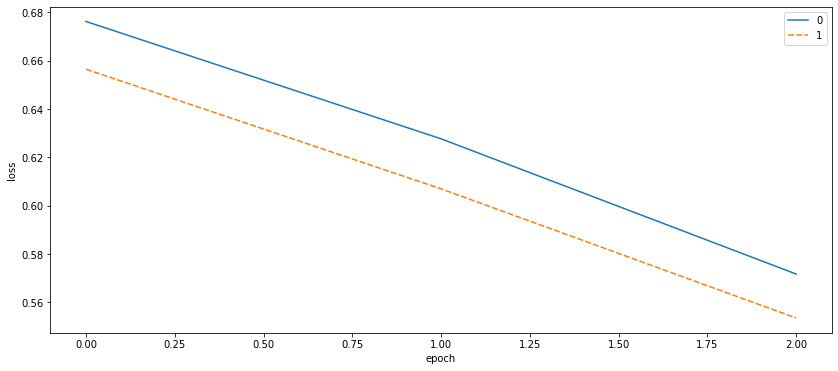

In [17]:
import seaborn as sns

# Plotting the loss, more info on loss: 
# https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/
plt.figure(figsize=(14, 6))
sns.lineplot(data=(history.history['loss'], history.history['val_loss']))
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

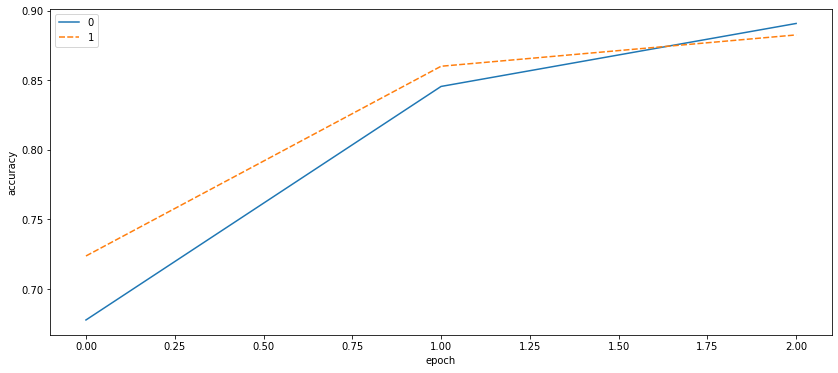

In [18]:
# Plotting the accuracy of the model's predictions
plt.figure(figsize=(14, 6))
sns.lineplot(data=(history.history['binary_accuracy'], history.history['val_binary_accuracy']))
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [19]:
import pickle

# Saving the trained model
filename = 'tori_classifier_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://f05adb4b-ff91-4a24-84b6-74fec72b1762/assets


INFO:tensorflow:Assets written to: ram://f05adb4b-ff91-4a24-84b6-74fec72b1762/assets
